
## COVID Data: An Example of .csv Data
### PH 212 COCC
#### Bruce Emerson 5/4/21

As an illustration of the utility of accessing .csv data files this notebook explores the COVID data set maintained by the NY Times on it's github. The particular data I decided to work with is the county by county data from across the country for the most recent 30 days. This is a remarkably small file (a few MB) which tempts me to down load the full pandemic data set but I am resisting for now.

[NY Times data github](https://github.com/nytimes/covid-19-data/blob/master/us-counties-recent.csv). 

In this same directory is a RequestDeschutesCOVID.ipynb notebook. This notebook reads the 30 day county by county data from the github above, filters the data for Deschutes County 

### Dependencies

The new dependency here is the [Pandas](https://pandas.pydata.org/) library which was developed to support data science applications in python. It is classically imported with the alias pd. It is installed as part of your Anaconda package. When you update Anaconda you can also update Pandas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
import requests

### Read csv from Pandas

As we get deeper into python we will need to begin to develop a richer understanding of how python works. We can do this incrementally so don't panic. In Pandas there are a variety of [data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) which are described in the pandas documentation. There is clearly a lot to learn be we will focus on [data frames](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) which are a data structure that matches our normal understanding of a two dimensional data set.

In [7]:
dataDeschutes = pd.read_csv("data/dataDeschutes.csv", sep='\t')
print(dataDeschutes)

          date     county   state     fips  cases  deaths
0   2021-04-06  Deschutes  Oregon  41017.0   6504    71.0
1   2021-04-07  Deschutes  Oregon  41017.0   6535    72.0
2   2021-04-08  Deschutes  Oregon  41017.0   6581    72.0
3   2021-04-09  Deschutes  Oregon  41017.0   6633    72.0
4   2021-04-10  Deschutes  Oregon  41017.0   6706    72.0
5   2021-04-11  Deschutes  Oregon  41017.0   6741    72.0
6   2021-04-12  Deschutes  Oregon  41017.0   6759    72.0
7   2021-04-13  Deschutes  Oregon  41017.0   6793    72.0
8   2021-04-14  Deschutes  Oregon  41017.0   6877    72.0
9   2021-04-15  Deschutes  Oregon  41017.0   6929    72.0
10  2021-04-16  Deschutes  Oregon  41017.0   6987    72.0
11  2021-04-17  Deschutes  Oregon  41017.0   7082    72.0
12  2021-04-18  Deschutes  Oregon  41017.0   7129    72.0
13  2021-04-19  Deschutes  Oregon  41017.0   7172    72.0
14  2021-04-20  Deschutes  Oregon  41017.0   7214    72.0
15  2021-04-21  Deschutes  Oregon  41017.0   7312    72.0
16  2021-04-22

### Rotation of Dates:

After some exploration I wondered if I could fix the messy date plotting that you see in the second plot below. I eventually found that I can rotate the plot labels on any axis which alllows the date, which is a long object, to be plotted vertically without overlapping with the adjacent labels. Cool!

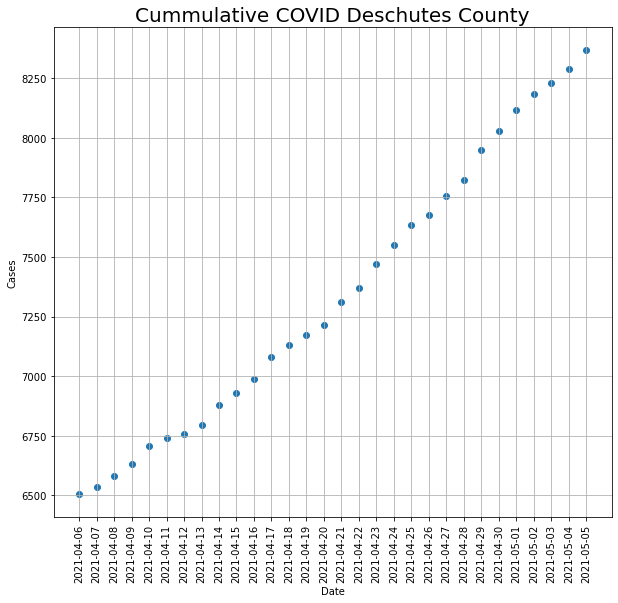

In [11]:
# dates rotated -- NICE
# code cell that creates the plot
dateRaw = dataDeschutes['date']
dataCases = dataDeschutes['cases']
fig1, ax1 = plt.subplots()
ax1.scatter(dateRaw, dataCases)

# a more explicit way to set labels
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Cases', fontsize = 10)
plt.title('Cummulative COVID Deschutes County', fontsize = 20)

# rotate the x tick labels so dates are readable
plt.xticks(rotation = '90')

# size the figure
fig1.set_size_inches(10, 9)
ax1.grid()

#fig.savefig("myplot.png")
plt.show()

### Finding Daily Cases:

The data set contains the cummulative case data. Epidemiologists have been focusing on the daily case numbers. The daily case number is the difference between each data point and the previous data point. This is a very common feature of data that folks are interested in and not surprisingly pandas and the pandas dataframe have a tool for that. This is another 'attribute' of the data frame called [pandas.DataFrame.diff](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html). It can do a variety of calculations but the default is to take the difference between successive data points.

I can also add this data to the data frame by defining a new column

Pandas is complaining about something I'm doing but I haven't figured it out yet. It still works but pandas is unhappy and I'll need to sort that out eventually.

In [13]:
dailyCases = dataDeschutes['cases'].diff()
day3Cases = dataDeschutes['cases'].diff(periods=3)
# dailyCases

### Future Work for Bruce:

When I try to put this daily data back in the data frame I get an error so I'm going to sidestep this for now and put it on my work list. I'm stepping on something about how the data frame wants me to work with the data.

In [38]:
#dataDeschutes['test'] = dailyCases
#dataDeschutes

### Oregon Case Criteria

Since we are currently wrestling with higher risk in Deschutes County I wondered if I could verify the state data that places Deschutes county in the high risk category. The [criteria that Oregon uses are listed on this webpage](https://coronavirus.oregon.gov/Pages/living-with-covid-19.aspx). As a county with a population of more than 30,000 (population of Deschutes county is pegged at 198,000 for 2019 - call it 200,000 for 2020) the case rate criteria is based on case rate per 100,000 over 14 days. It is not entirely clear what the 'over 14 days' which is partly what I'm curious about.

https://coronavirus.oregon.gov/Pages/living-with-covid-19.aspx

### What We Can Learn:

The rate/100,000 averaged over 3 days has stayed below 50 for all of April according to this data. That would appear to put us in a moderate risk category. On the other hand the state has placed us in the extreme risk category according to the website linked above. How can this be? The value in looking at the actual data is that it makes us think! It is likely that what the criteria means is that the **TOTAL CASES/100,000 over 14 days** is what is being assessed. 

Let's imagine that is what is being measured. Stated another way 200 cases/100,000 over 14 days is and 14.28 cases/100,000 each day for 14 days. Reframing the state criteria this way allows us to put reference lines on the graph. Here are the locations of the dividing lines between the criteria IF that is what is meant:

1. 50 cases/100,000 => 3.57 cases/100,000/day
1. 100 cases/100,000 => 7.14 cases/100,000/day
1. 200 cases/100,000 => 14.28 cases/100,000/day

In [16]:
peopleDeschutes = 200000.0
rateDivider = peopleDeschutes/100000.0
rateDivider

2.0

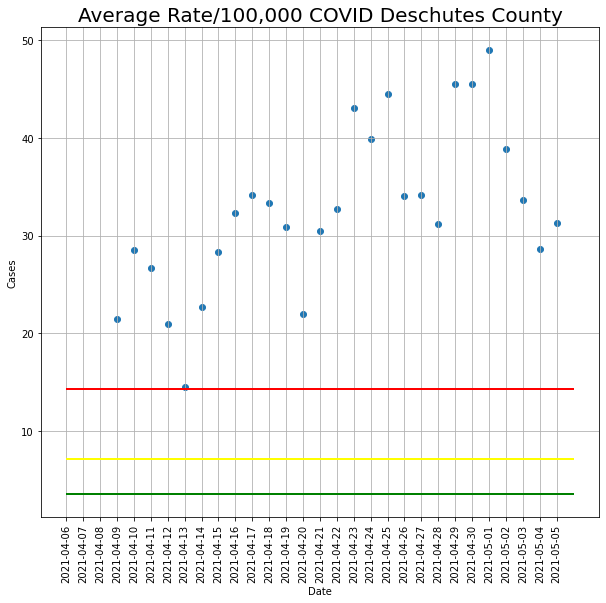

In [19]:
# 3 day rolling rate 
# code cell that creates the plot
# divide by 3 to get rolling average
# divide by rateDivider to get rate/100,000 population
rate3Day = day3Cases/(3*rateDivider)
fig2, ax2 = plt.subplots()
ax2.scatter(dateRaw, rate3Day)

# Oregon daily average thresholds based on 14 day cummulative cases
rateLow = 3.57
rateModerate = 7.14
rateHigh = 14.28

# a more explicit way to set labels
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Cases', fontsize = 10)
plt.title('3 Day Average COVID Deschutes County', fontsize = 20)

# Boundaries between different risk levels
ax2.hlines(rateLow, 0, 30,
         color = 'green', linestyle = '-',
         linewidth = 2., label = "low risk")
ax2.hlines(rateModerate, 0, 30,
         color = 'yellow', linestyle = '-',
         linewidth = 2., label = "moderate risk")
ax2.hlines(rateHigh, 0, 30,
         color = 'red', linestyle = '-',
         linewidth = 2., label = "high risk")

# a more explicit way to set labels
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Cases', fontsize = 10)
plt.title('Average Rate/100,000 COVID Deschutes County', fontsize = 20)
# rotate the x tick labels so dates are readable
plt.xticks(rotation = '90')

# size the figure
fig2.set_size_inches(10, 9)
ax2.grid()

#fig.savefig("myplot.png")
plt.show()

### Reflections:

I gotta stop now but I feel like this is an example of an important learning experience with data and science. When you have the actual data you can dig into it to develop a greater understanding. I'm not sure that I have this figured out yet but I have much better questions to ask. Based on this analysis I am surprised that Deschutes County is stepping down from 'extreme risk' next week. The data on the Oregon website indicates we have 467 cases/100,000/14 days which is 33 cases/100,000/day and that matches the data above. Boom! 

Done for now. Happy exploring:)